<a href="https://colab.research.google.com/github/Nexbase8123/Data-Analysis-Project/blob/main/My_Project_(Covid_19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE WALKTHROUGH
### Project Done By: Ebenezer

Problem Statement


1.   Data analysis:
2.   list and work KPIs (Total confirmed cases, Total Death, Total Recovery Cases, Active Cases, Death Rate, Recovery Rate)
3.   Generate insights & trend analysis: why a country exhibit a higher death-to-case ratio compared to others[Time Series Analysis(trends over time for confirmed,death]
4.   Factors that affects(Increase/Deduses): What factors influesnes higer recovery rate in countries
Regional comparison(WHO regions)
5.   Anticipate future outbreaks
6.   Modeling of Spread of virus


Project Objective
1. Data Acqusition
2. Priliminary Data Analysis
3. Data Interpritation
4. EDA
5. Data Preprocessing
6. Building the Model
7. Building time series model



# **Phase 1 Data Acqusition**

### **Task 1.1 Import Libraries**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
####################################
# Libraries for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import

### **Task 1.2 Load in all the datasets**

In [47]:
df1=pd.read_csv('/content/drive/MyDrive/Data Analysis/Covid Dataset/country_wise_latest.csv')

In [48]:
df2=pd.read_csv('/content/drive/MyDrive/Data Analysis/Covid Dataset/usa_county_wise.csv')

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Task 1.3 Preview of the dataset**

In [50]:
df1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [51]:
df1.shape

(187, 15)

In [52]:
df1.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


## **Task 2.0 Priliminary Analysis**

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

### **Task 2.1 Setting Index**

In [54]:
# To reset index
df1.reset_index(inplace =True)
df1

,index,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [55]:
#Dropping the index column
df1.drop(["index"], axis=1, inplace=True)

In [56]:
df1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


### **Task 2.2 Sorting index**

In [57]:
# Sort INDEX in descending order
df1.sort_index(ascending=False)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe


In [58]:
# Get the index corresponding to the maximum value in the 'Deaths' column (which is now the index)
x = df1.index.max()

### **Task 2.3 Checking For Missing Values**

In [59]:
df1.isnull().sum()

,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [60]:
df1.dropna(inplace=True)

### **Task 2.4 Viewing all Countrt/Region in the Dataset**

In [61]:
df1['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

# **Phase 2 Exploratory Data Analysis(EDA)**

### **Task 3.0 Descriptive Analysis**

In [62]:
df1.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


### **Task 3.1 Correlation Matrix**

In [63]:
# Correlation Matrix
correlation_matrix = df1.corr(numeric_only=True) # Specify numeric_only=True to consider only numerical columns
print(correlation_matrix)

                        Confirmed    Deaths  Recovered    Active  New cases  \
Confirmed                1.000000  0.934698   0.906377  0.927018   0.909720   
Deaths                   0.934698  1.000000   0.832098  0.871586   0.806975   
Recovered                0.906377  0.832098   1.000000  0.682103   0.818942   
Active                   0.927018  0.871586   0.682103  1.000000   0.851190   
New cases                0.909720  0.806975   0.818942  0.851190   1.000000   
New deaths               0.871683  0.814161   0.820338  0.781123   0.935947   
New recovered            0.859252  0.765114   0.919203  0.673887   0.914765   
Deaths / 100 Cases       0.063550  0.251565   0.048438  0.054380   0.020104   
Recovered / 100 Cases   -0.064815 -0.114529   0.026610 -0.132618  -0.078666   
Deaths / 100 Recovered   0.025175  0.169006  -0.027277  0.058386  -0.011637   
Confirmed last week      0.999127  0.939082   0.899312  0.931459   0.896084   
1 week change            0.954710  0.855330   0.9100

**Task 3.2 Box Plot for Confirmed, Death, Recovered and Active**

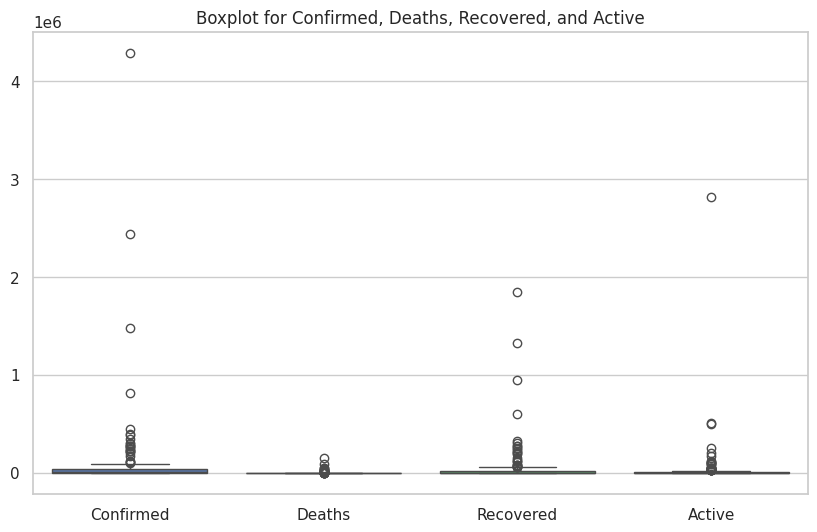

In [64]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df1[['Confirmed', 'Deaths', 'Recovered', 'Active']])

plt.title('Boxplot for Confirmed, Deaths, Recovered, and Active')

plt.show()

# **Phase 3**

**Task 4.0 KPIs**

#  Task 4.1 list of KPIs**


*  Total Confirmed cases
*  Tota Death
*  Total Recovery Cases
*  Active Cases
*  Death Rate
*  Recovery Rate



**Task 4.2 Date Rate, Recovery Rateand Active Cases Calculation**

In [65]:
# Calculating thr Death Rate, Recovery Rate and Active Cases
df1['Death Rate'] = (df1['Deaths'] / df1['Confirmed']) * 100
df1['Recovery Rate'] = (df1['Recovered'] / df1['Confirmed']) * 100
df1['Active Cases'] = df1['Confirmed'] - (df1['Deaths'] + df1['Recovered'])

# Display the calculated KPIs
kpi_columns = ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active Cases', 'Death Rate', 'Recovery Rate']
kpi_data = df1[kpi_columns]
print(kpi_data.sort_values(by='Confirmed', ascending=False).head(10))  # Top 10 countries by confirmed cases

     Country/Region  Confirmed  Deaths  Recovered  Active Cases  Death Rate  \
173              US    4290259  148011    1325804       2816444    3.449932   
23           Brazil    2442375   87618    1846641        508116    3.587410   
79            India    1480073   33408     951166        495499    2.257186   
138          Russia     816680   13334     602249        201097    1.632708   
154    South Africa     452529    7067     274925        170537    1.561668   
111          Mexico     395489   44022     303810         47657   11.131030   
132            Peru     389717   18418     272547         98752    4.725993   
35            Chile     347923    9187     319954         18782    2.640527   
177  United Kingdom     301708   45844       1437        254427   15.194824   
81             Iran     293606   15912     255144         22550    5.419508   

     Recovery Rate  
173      30.902656  
23       75.608414  
79       64.264803  
138      73.743572  
154      60.753013  
111 

### **Plot for my calculation**

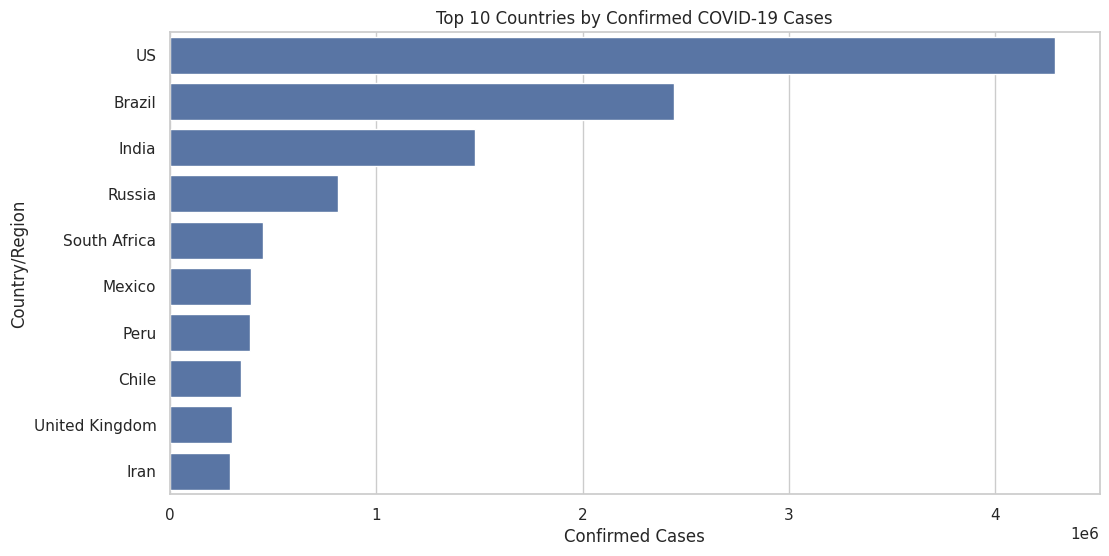

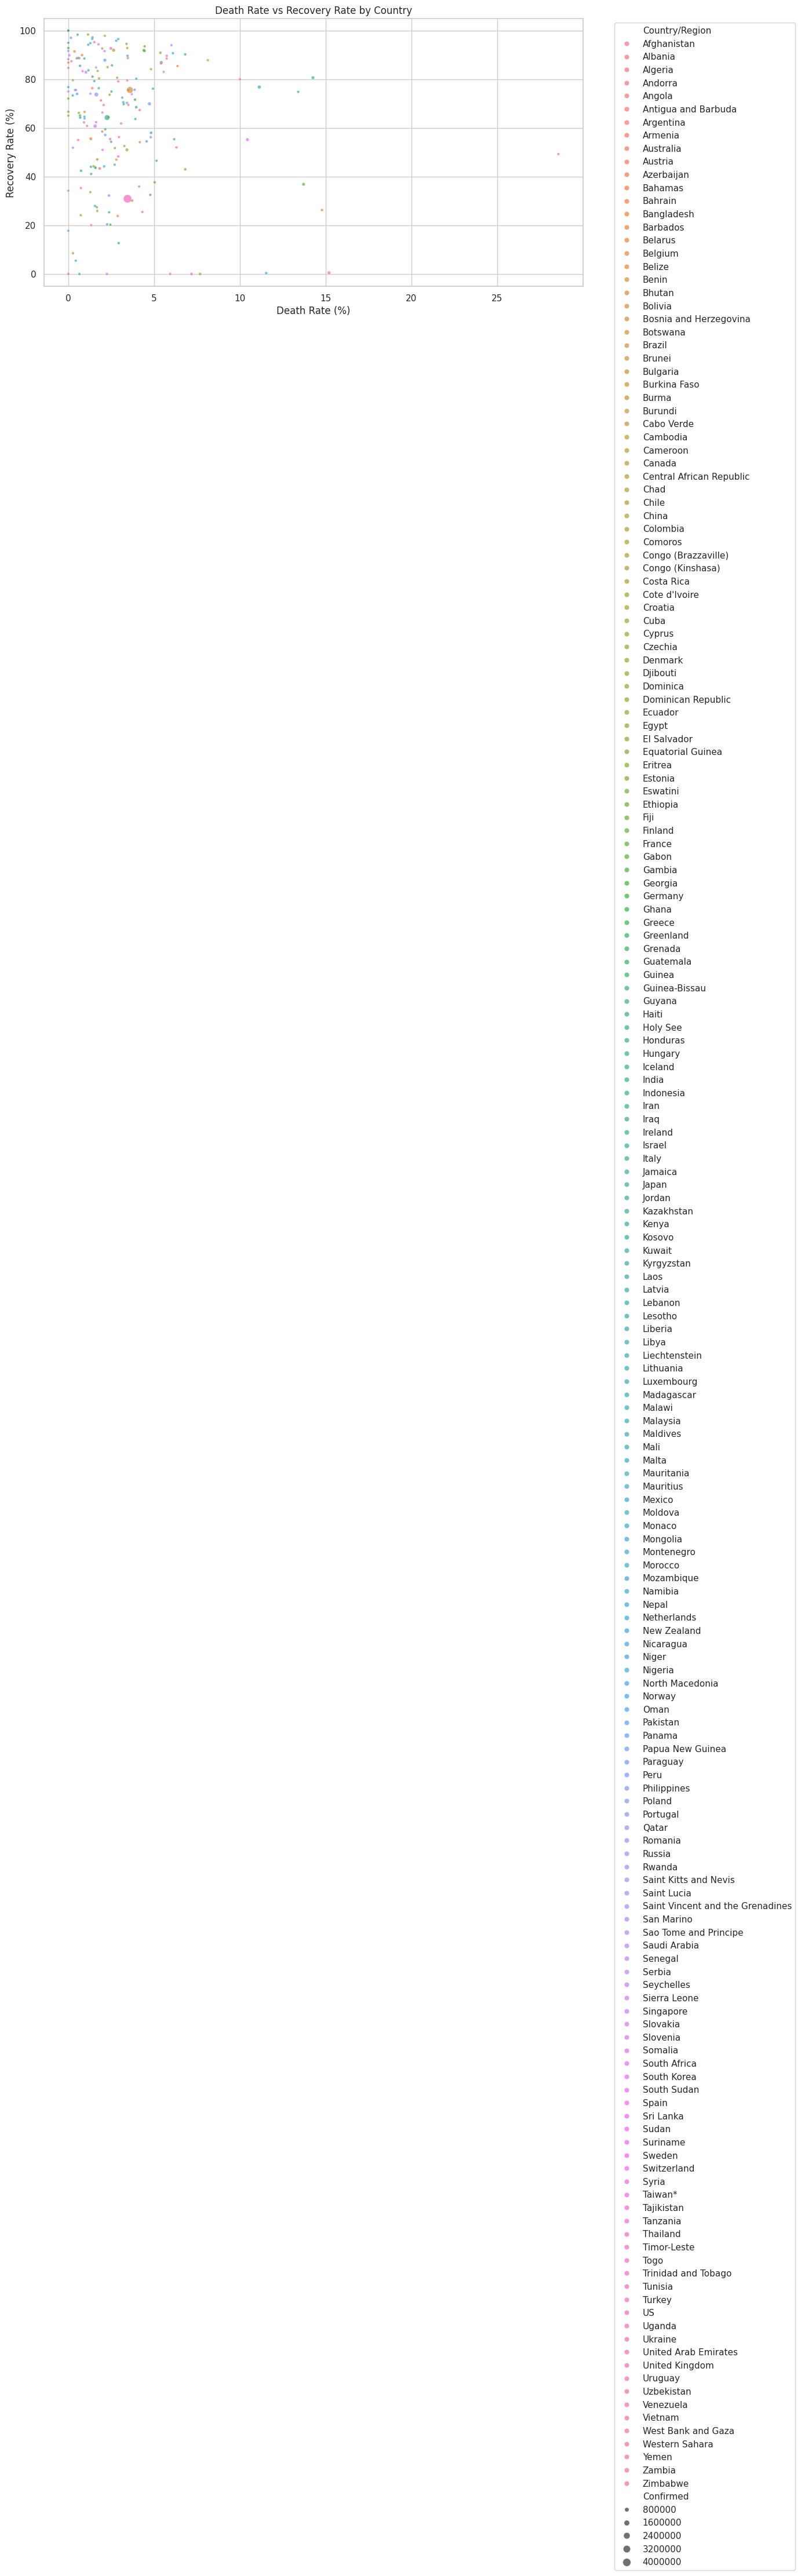

In [66]:
# Set style for seaborn
sns.set(style="whitegrid")

# Bar plot for top 10 countries by confirmed cases
plt.figure(figsize=(12, 6))
top_countries = kpi_data.sort_values(by='Confirmed', ascending=False).head(10)
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries)
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.show()

# Line plot for Death Rate vs Recovery Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(data=kpi_data, x='Death Rate', y='Recovery Rate', hue='Country/Region', size='Confirmed', sizes=(10, 100), alpha=0.7)
plt.title('Death Rate vs Recovery Rate by Country')
plt.xlabel('Death Rate (%)')
plt.ylabel('Recovery Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Task 4.3 Top 10 Countries With the Highest Death**

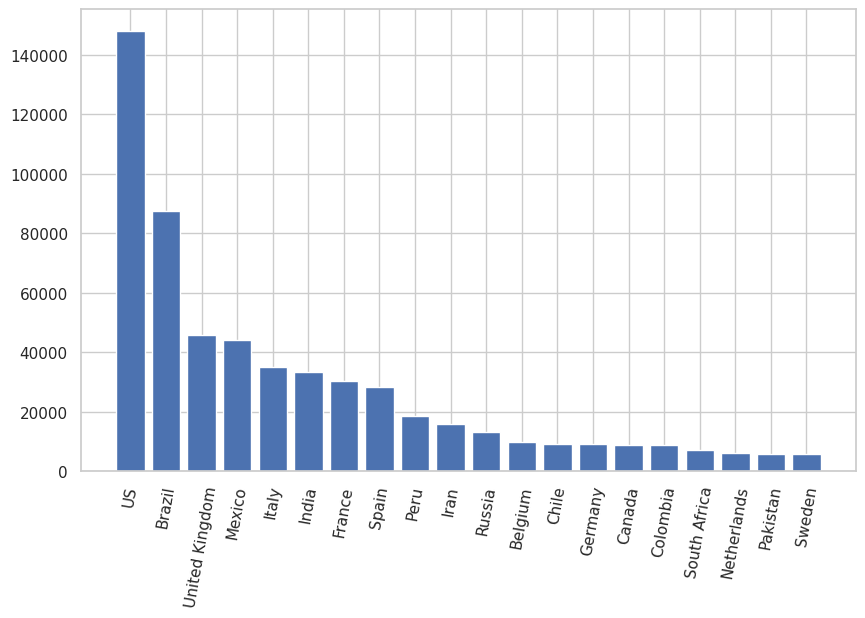

In [67]:

x = df1.index.max()

# Country with maximum number of deaths
df1.loc[x,"Country/Region"]


# Resetting the index to default
df1 = df1.reset_index()

# Creating the country_deaths dataframe with resetted index
country_deaths = df1[['Country/Region', 'Deaths']]

#Sorting by 'Deaths' in descending order for better visualization
country_deaths = country_deaths.sort_values(by='Deaths', ascending=False)

import matplotlib.pyplot as plt  # Assuming you want to use matplotlib for the plot
plt.figure(figsize=(10, 6))
plt.bar(country_deaths['Country/Region'].head(20), country_deaths['Deaths'].head(20))
plt.xticks(rotation=80)
plt.show()

**Task 4.4**

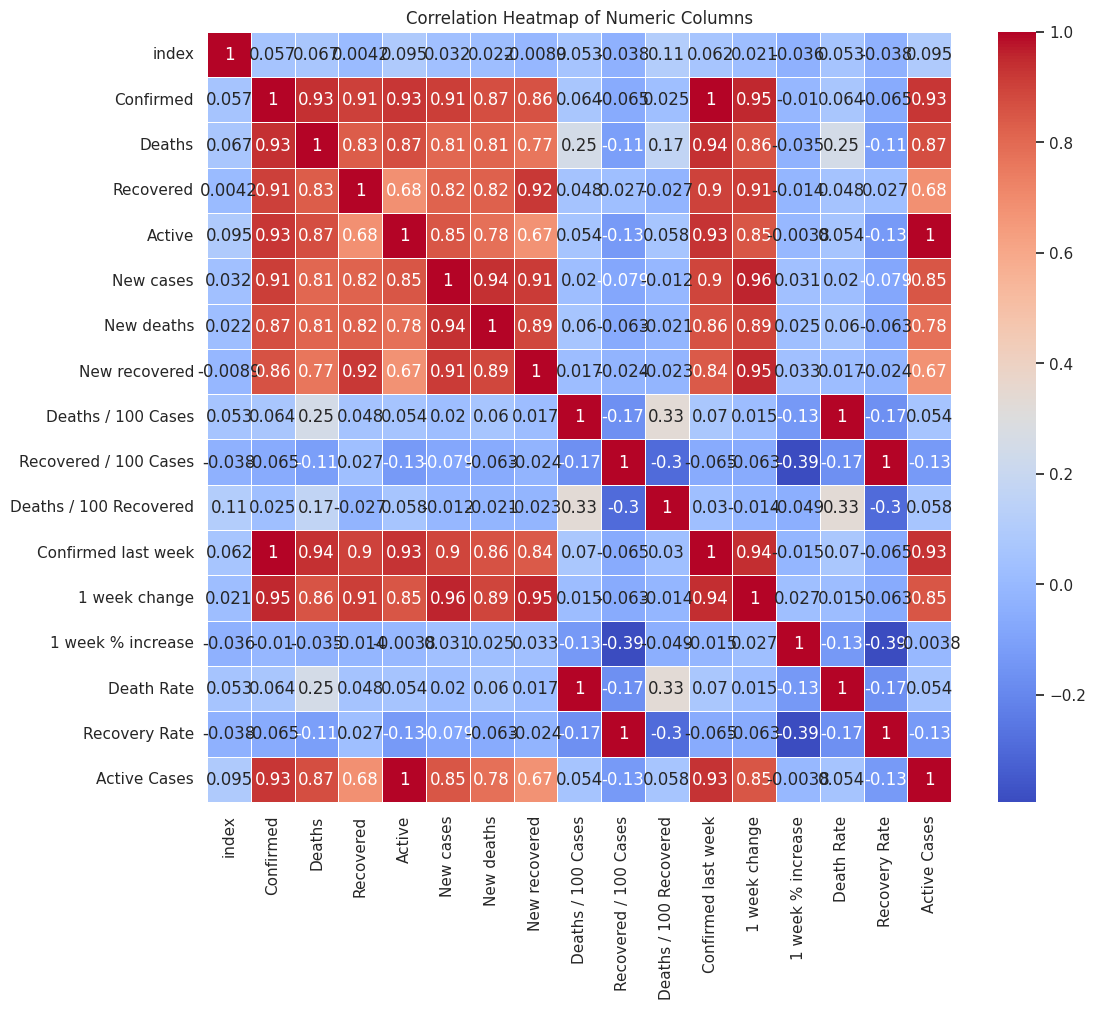

In [68]:
numeric_df = df1.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


**Task 4.5 Top 10 Countries with the Highest Confirmed Cases**

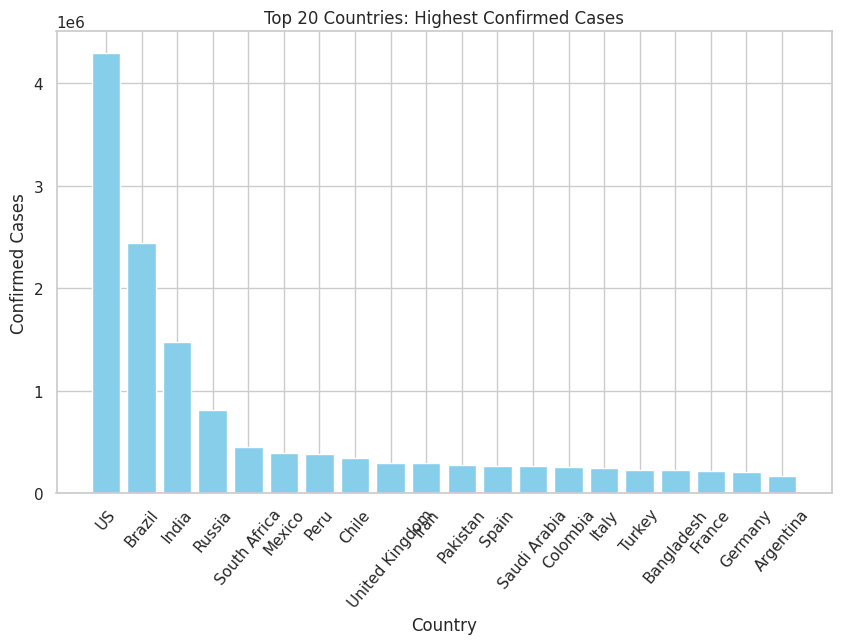

In [69]:
# Sorting by 'Confirmed' in descending order for better visualization
country_confirmed = df1.sort_values(by='Confirmed', ascending=False)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(country_confirmed['Country/Region'].head(20), country_confirmed['Confirmed'].head(20), color='skyblue')
plt.title('Top 20 Countries: Highest Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=50)
plt.show()

**Task 4.6 Sum of deaths in WHO region**

In [70]:
print(df1.columns)

Index(['index', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region', 'Death Rate', 'Recovery Rate', 'Active Cases'],
      dtype='object')


In [71]:
df1

,index,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Death Rate,Recovery Rate,Active Cases
0,0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,3.499435,69.486805,9796
1,1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,2.950820,56.250000,1991
2,2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,4.157581,67.339935,7973
3,3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,5.733186,88.533627,52
4,4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,4.315789,25.473684,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean,0.734394,35.326240,6791
183,183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa,10.000000,80.000000,1
184,184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,28.562980,49.260792,375
185,185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa,3.075571,61.840949,1597


### **Tasl 4.7 Sum of Deaths in (WHO) Region Africa**

In [72]:
df1 = df1.set_index("WHO Region")
s = df1.loc["Africa"]

In [73]:
# Total sum of Deaths
s["Deaths"].sum()

12223

There are total 12223 deaths in Africa as a Region

**Task 4.8 Regional Mortality**

<BarContainer object of 187 artists>

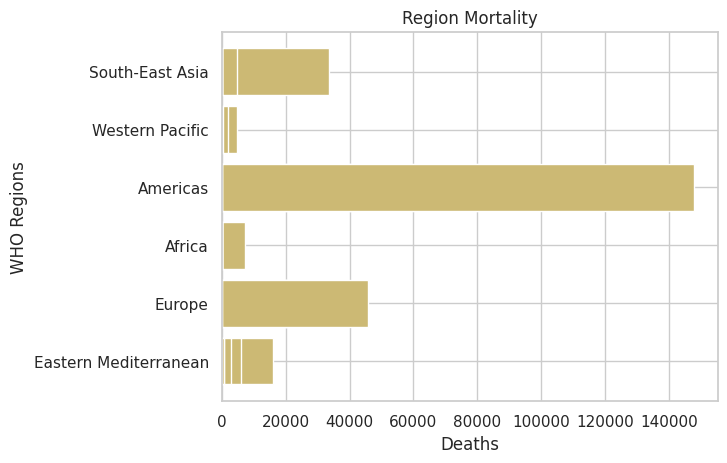

In [74]:
# BarChart
plt.title("Region Mortality")
plt.ylabel("WHO Regions")
plt.xlabel("Deaths")
# Use df1.index to access the index values (formerly "WHO Region")
plt.barh(df1.index, df1["Deaths"], color="y")  # barh use for horizontal bar graph

**Task 4.9 Recovery Distribution**

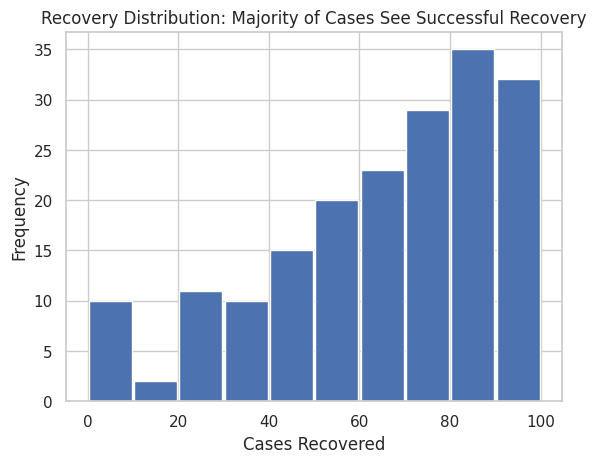

In [75]:
# Histogram
plt.title("Recovery Distribution: Majority of Cases See Successful Recovery")
plt.xlabel("Cases Recovered")
plt.ylabel("Frequency")
plt.hist(df1["Recovered / 100 Cases"],bins=10,rwidth=0.95,color="b")
plt.show()

In [76]:
# Average recovery rate
df1["Recovered / 100 Cases"].mean()

64.82053475935828

**Task 4.10 Average Recovery Rate**

**Average recovery rate is 65%**

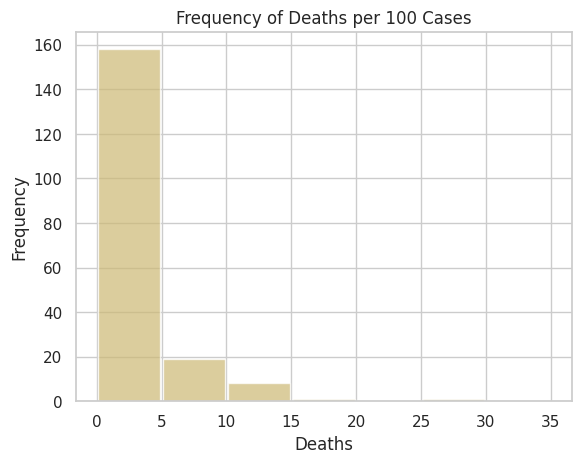

In [77]:
plt.title("Frequency of Deaths per 100 Cases")
plt.xlabel("Deaths")
plt.ylabel("Frequency")
plt.hist(df1["Deaths / 100 Cases"],bins=[0,5,10,15,20,25,30,35],rwidth=0.95,color='y',alpha=0.7)
plt.show()

In [78]:
# Average death rate
df1["Deaths / 100 Cases"].mean()

3.0195187165775392

Average death rate is 3%

**Task 4.11 Top Affected Countries**

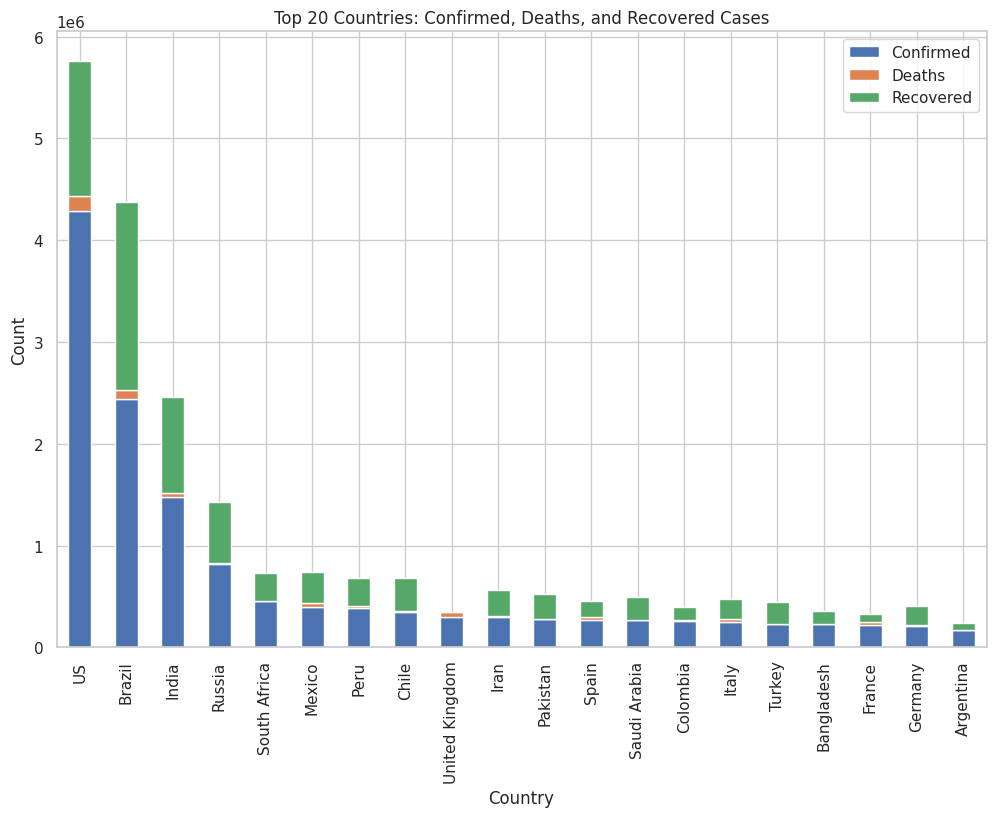

In [79]:
selected_countries = df1[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']].dropna()

# Grouping data by country and summing up the cases
grouped_data = selected_countries.groupby('Country/Region').sum()

# Sorting by total confirmed cases and selecting top 20
top_20_countries = grouped_data.sort_values(by='Confirmed', ascending=False).head(20)

# Plotting a bar chart
top_20_countries.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 20 Countries: Confirmed, Deaths, and Recovered Cases')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## **Phase 4**

**Task 5.0**

**Task 5.1 Pie chart for confirmed Top 5 countries**

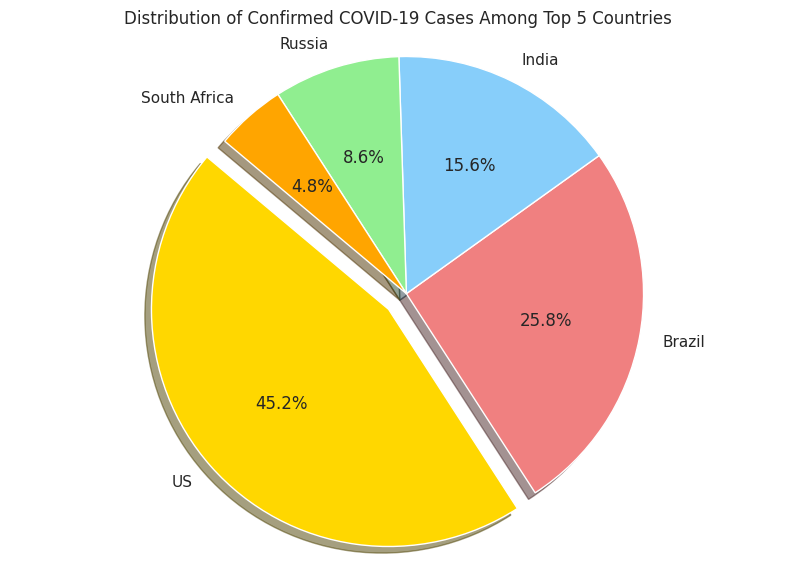

In [80]:
# Select top 5 countries by confirmed cases for the pie chart
top_countries = df1.sort_values(by='Confirmed', ascending=False).head(5)

# Data for the pie chart
labels = top_countries['Country/Region']
sizes = top_countries['Confirmed']
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange']
explode = (0.1, 0, 0, 0, 0)  # explode the first slice (largest)

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Confirmed COVID-19 Cases Among Top 5 Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [81]:
df1 = pd.read_csv('/content/drive/MyDrive/Data Analysis/Covid Dataset/country_wise_latest.csv')

**Task 5.2 Countries with highest date rate**

In [82]:
# country with highest death rate
df1[["Deaths / 100 Cases", "Country/Region", "WHO Region"]].sort_values("Deaths / 100 Cases", ascending=False)

,Deaths / 100 Cases,Country/Region,WHO Region
184,28.56,Yemen,Eastern Mediterranean
177,15.19,United Kingdom,Europe
16,14.79,Belgium,Europe
85,14.26,Italy,Europe
61,13.71,France,Europe
...,...,...,...
148,0.00,Seychelles,Africa
142,0.00,Saint Vincent and the Grenadines,Americas
140,0.00,Saint Kitts and Nevis,Americas
141,0.00,Saint Lucia,Americas


**Task 5.3 Who Region**

In [83]:
Region = df1.groupby(by='WHO Region').sum()
Region

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
WHO Region,,,,,,,,,,,,,,
Africa,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,723207,12223,440645,270339,12176,353,14563,110.71,2736.71,inf,608120,115087,868.15
Americas,Antigua and BarbudaArgentinaBahamasBarbadosBel...,8839286,342732,4468616,4027938,129531,3555,94776,106.84,2180.20,inf,7815198,1024088,571.59
Eastern Mediterranean,AfghanistanBahrainDjiboutiEgyptIranIraqJordanK...,1490744,38339,1201400,251005,12410,445,14843,78.39,1465.05,inf,1398847,91897,230.61
Europe,AlbaniaAndorraArmeniaAustriaAzerbaijanBelarusB...,3299523,211144,1993723,1094656,22294,304,11732,235.11,3843.56,inf,3146816,152707,435.10
South-East Asia,BangladeshBhutanBurmaIndiaIndonesiaMaldivesNep...,1835297,41349,1156933,637015,48993,734,37582,12.96,667.04,19.56,1478283,357014,85.13
Western Pacific,AustraliaBruneiCambodiaChinaFijiJapanLaosMalay...,292428,8249,206770,77409,3289,24,1127,20.64,1228.88,28.60,266359,26069,353.78


**Task 5.4 Confirmed Cases in WHO Region**

Text(0.5, 1.0, ' Confirmed Cases')

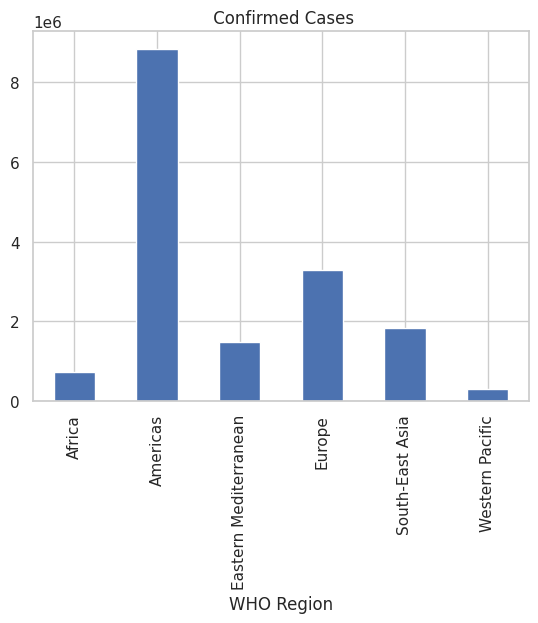

In [84]:
Region['Confirmed'].plot(kind='bar', )
plt.title(' Confirmed Cases')

**Task 5.5 Heat Map of Confirmed cases in WHO Region**

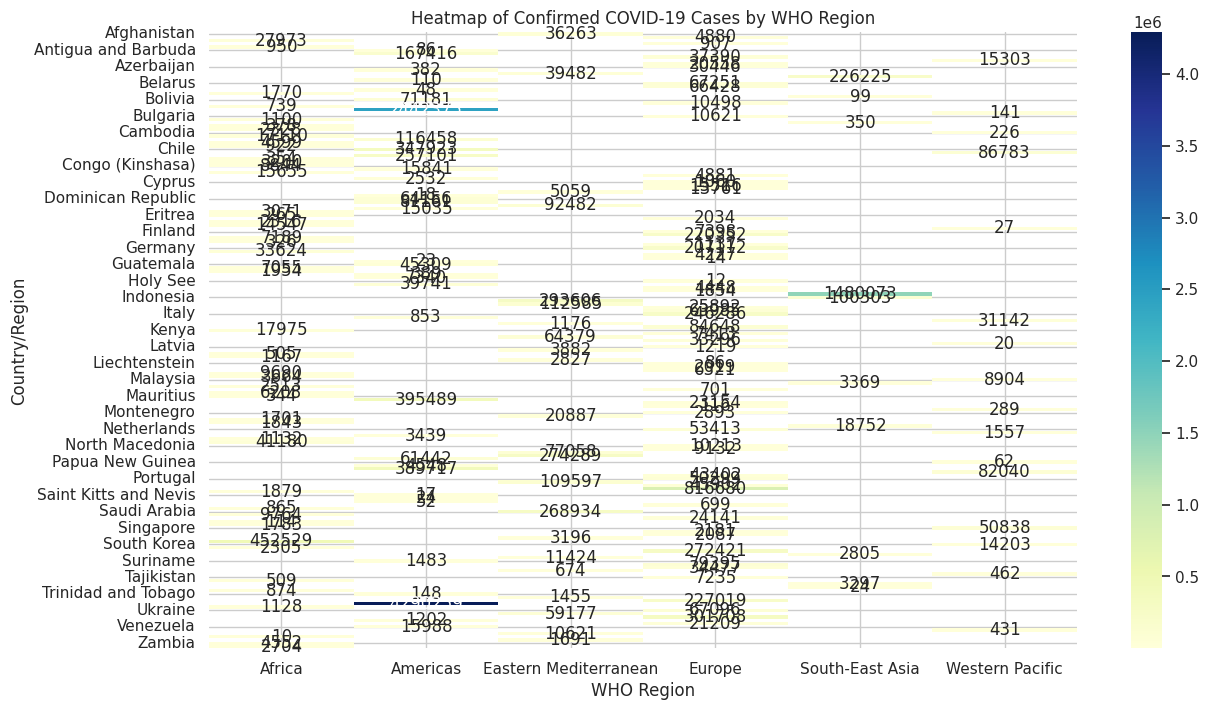

In [85]:
# Pivoting the data for heatmap visualization
heatmap_data = df1.pivot(index="Country/Region", columns="WHO Region", values="Confirmed")

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Heatmap of Confirmed COVID-19 Cases by WHO Region')
plt.show()

**Task 5.6 Pair Plot Between KPIs**

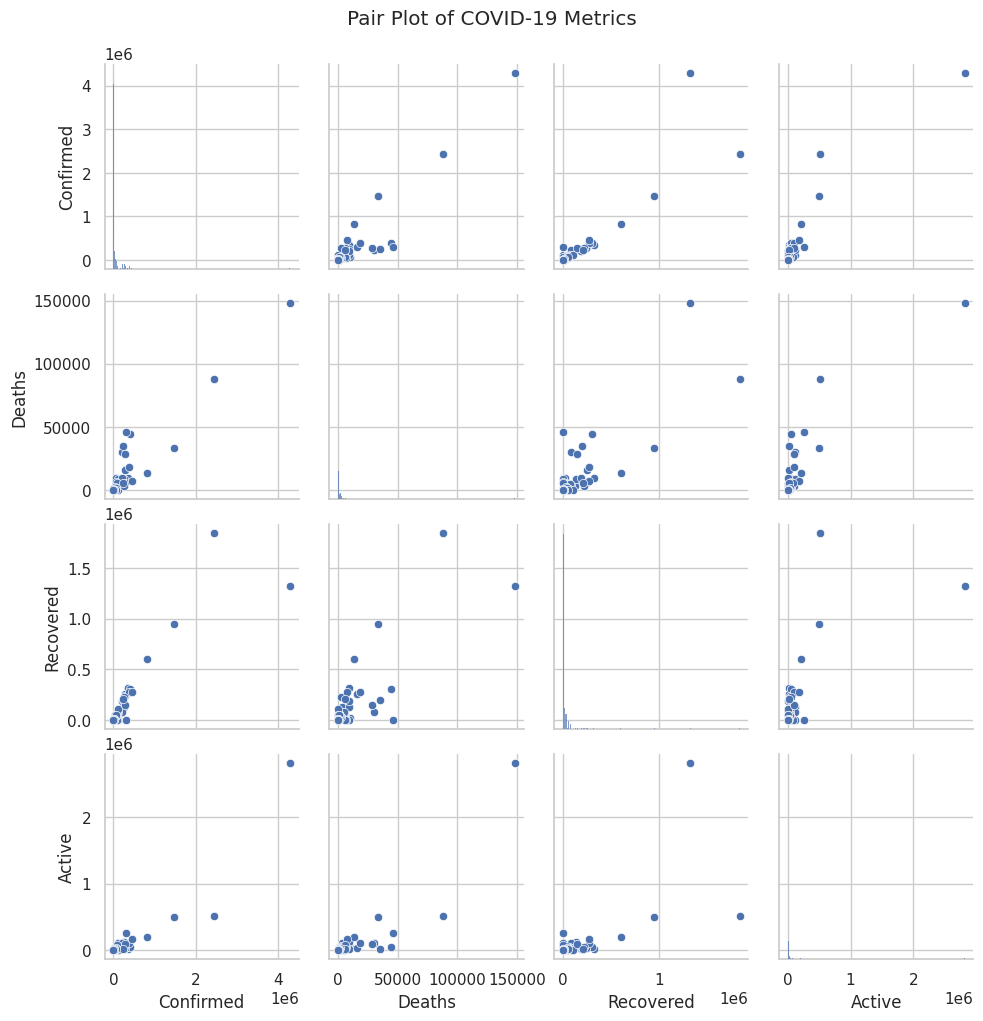

In [86]:
# Pair plot to visualize relationships between different KPIs
sns.pairplot(df1[['Confirmed', 'Deaths', 'Recovered', 'Active']])
plt.suptitle('Pair Plot of COVID-19 Metrics', y=1.02)
plt.show()

**Task 5.7 Impact of COVID-19 Over the Last Week**

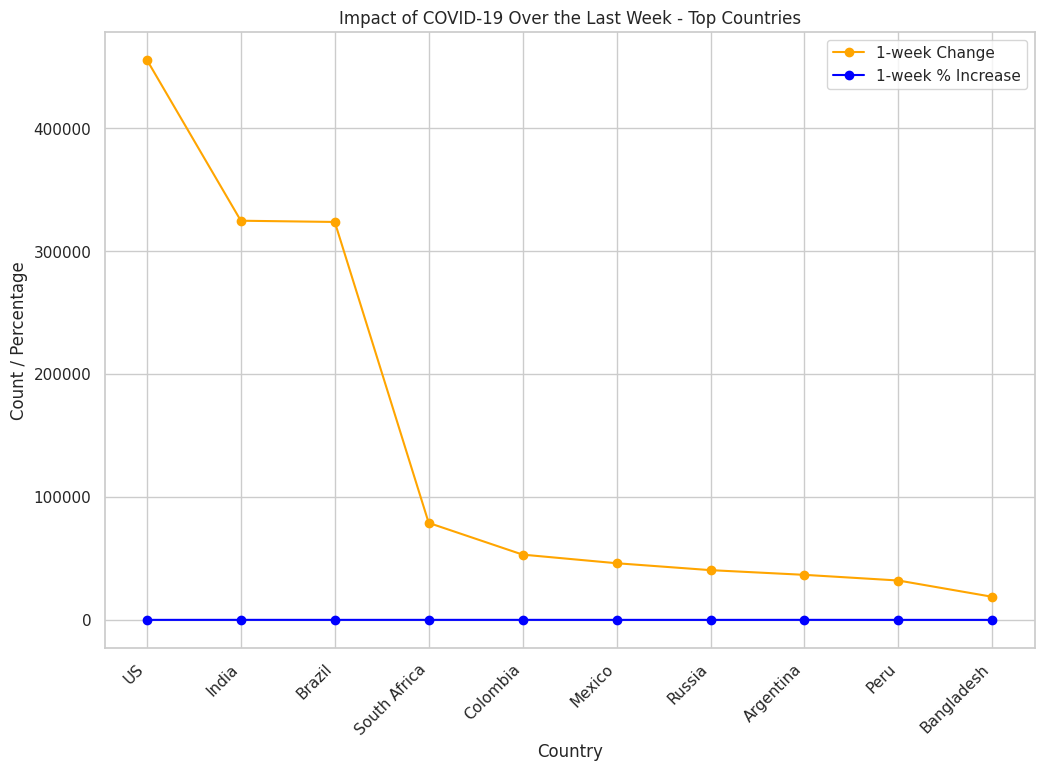

In [87]:
# Select relevant columns
selected_columns = ['Country/Region', '1 week change', '1 week % increase']

# Filtering out rows with NaN values in the selected columns
df_last_week = df1[selected_columns].dropna()

# Sorting the dataframe by '1 week change' in descending order to get the top countries
df_last_week_sorted = df_last_week.sort_values(by='1 week change', ascending=False).head(10)

# Plotting a line chart for the top countries in 1-week change and percentage increase
plt.figure(figsize=(12, 8))
plt.plot(df_last_week_sorted['Country/Region'], df_last_week_sorted['1 week change'], marker='o', label='1-week Change', color='orange')
plt.plot(df_last_week_sorted['Country/Region'], df_last_week_sorted['1 week % increase'], marker='o', label='1-week % Increase', color='blue')
plt.title('Impact of COVID-19 Over the Last Week - Top Countries')
plt.xlabel('Country')
plt.ylabel('Count / Percentage')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

### **Future forecast**

In [88]:
def test_stationarity(timeseries):
  rolmean = timeseries.rolling(window=12).mean()
  rolstd = timeseries.rolling(window=12).std()

  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.show

  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

  print(dfoutput)

In [89]:
# Instead of using infer_datatime_format, try using infer_datetime_format
df1['Confirmed'] = pd.to_datetime(df1['Confirmed'], infer_datetime_format=True)
indexed_df1 = df1.set_index(['Confirmed'])
indexed_df1.head()

,Country/Region,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
Confirmed,,,,,,,,,,,,,,
1970-01-01 00:00:00.000036263,Afghanistan,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1970-01-01 00:00:00.000004880,Albania,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
1970-01-01 00:00:00.000027973,Algeria,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
1970-01-01 00:00:00.000000907,Andorra,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
1970-01-01 00:00:00.000000950,Angola,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


## ***MY Model***

Mean Squared Error: 11766418796.946941


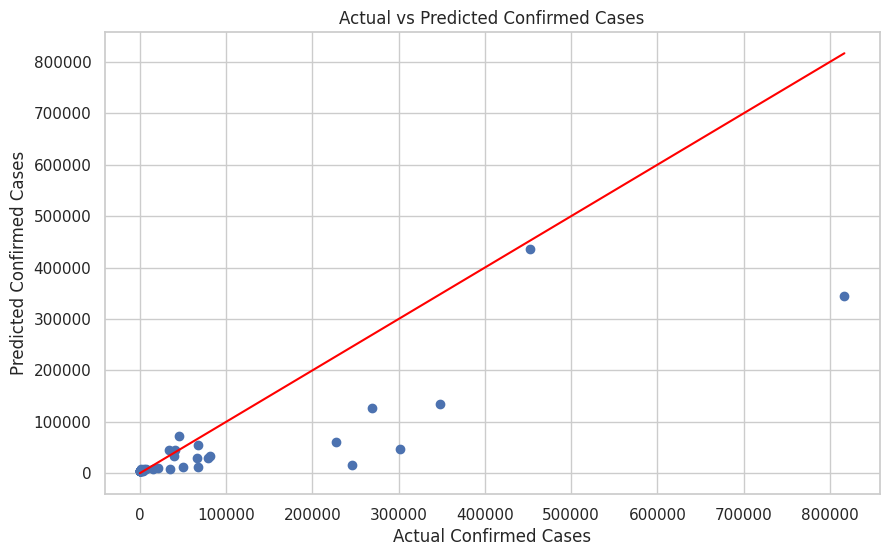

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Data Analysis/Covid Dataset/country_wise_latest.csv')

# Prepare data for modeling (using New cases to predict Confirmed)
X = data[['New cases']]  # Independent variable (features)
y = data['Confirmed']     # Dependent variable (target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Confirmed Cases')
plt.ylabel('Predicted Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of equality
plt.show()